Import packages to load data.

In [1]:
import pandas as pd # used for loading csv
import numpy as np # used to load and organize image data

Connect to drive.

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Train on Cuda if available:

In [3]:
import torch
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


Import data files.

In [4]:
images = np.load("/content/drive/MyDrive/Colab Notebooks/Advanced Analytics/images.npy", allow_pickle=True)
labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Advanced Analytics/labels.csv")



The next steps are used to explore the data. We start by checking the shape of the images data and the head of the labels to make sure they have imported correctly.

In [5]:
print(images.shape)
print(labels.shape)
labels.head()

(4750, 128, 128, 3)
(4750, 1)


,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


Determine mean and standard deviation of images data to use in normalization later:

In [6]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor()])

images_tr = torch.stack([transform(image) for image in images])

sumel = 0.0
countel = 0
for img in images_tr:
    sumel += img.sum([1, 2])
    countel += torch.numel(img[0])
mean = sumel/countel
std = torch.sqrt(sumel/countel)
print("mean: " + str(mean))
print("standard deviation: " + str(std))

mean: tensor([0.2068, 0.2889, 0.3283])
standard deviation: tensor([0.4548, 0.5375, 0.5730])


Get a list of plant labels being used.

In [7]:
labels['Label'].unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

Create list from categories.

In [8]:
categories = ['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Maize', 'Sugar beet', 'Scentless Mayweed', 'Black-grass',
       'Loose Silky-bent']
num_categories = len(categories) # will be used to create image grid
print(num_categories)

12


Visualize the distribution of the categories.

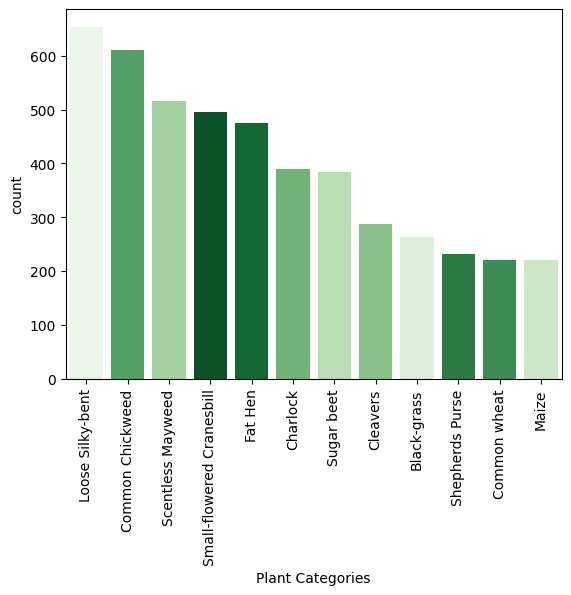

In [9]:
import matplotlib.pyplot as plt # used to show plot and add information
import seaborn as sns # used to create plot

sns.countplot(x='Label', data=labels, order=labels['Label'].value_counts().index, legend=False, hue='Label', palette='Greens_r')
plt.xlabel('Plant Categories')
plt.xticks(rotation=90)
plt.show()

We can see that the Loose Silky-bent category contains more images than the others, and that common wheat and maize have the fewest images.

Visualize samples with associated categories:

In [10]:
from mpl_toolkits.axes_grid1 import ImageGrid # used to create image grid
import random
# Set seed for reproducibility
random_state = 12
random.seed(random_state)

# Set grid parameters
fig = plt.figure(1, figsize=(num_categories, num_categories))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categories, num_categories), axes_pad=0.05)
i = 0

# Create loop for plotting images in each category
for category_id, category in enumerate(categories):
  condition = labels["Label"] == category
  plant_label = labels[condition].index.tolist()
  for k in range(min(12, len(plant_label))):
      ax = grid[i]
      ax.imshow(images[plant_label[k]])
      ax.axis('off')
      if i % num_categories == num_categories - 1:
        # used to print the names for each category
        ax.text(200, 70, category, verticalalignment='center')
      i += 1

plt.show()

Output hidden; open in https://colab.research.google.com to view.

One-hot encoding of categories:

In [11]:
import pandas as pd

print(labels.head(5))
labels = pd.get_dummies(labels, dtype=int)
#labels.reset_index(inplace=False)
print(labels.head(5))
print(labels.shape)

                       Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill
   Label_Black-grass  Label_Charlock  Label_Cleavers  Label_Common Chickweed  \
0                  0               0               0                       0   
1                  0               0               0                       0   
2                  0               0               0                       0   
3                  0               0               0                       0   
4                  0               0               0                       0   

   Label_Common wheat  Label_Fat Hen  Label_Loose Silky-bent  Label_Maize  \
0                   0              0                       0            0   
1                   0              0                       0            0   
2                   0              0                       0            0   
3                   0              0 

Train-validation-test split:

In [12]:
from sklearn.model_selection import train_test_split

# Split into train and test (80%/20%)
X_train, X_test1, y_train, y_test1 = train_test_split(
    images, labels, test_size=0.20, stratify=labels, random_state = random_state)
# Split into test and validation (50/50 = 10%/10% of total)
X_val, X_test, y_val, y_test = train_test_split(
    X_test1, y_test1, test_size=0.50, stratify=y_test1, random_state = random_state)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape)

# Save data sets
from numpy import asarray
from numpy import savetxt
X_train_array = asarray(X_train)
#np.save('/content/drive/MyDrive/Colab Notebooks/Advanced Analytics/X_train.npy', X_train_array)
y_train_array = asarray(y_train)
#np.save('/content/drive/MyDrive/Colab Notebooks/Advanced Analytics/y_train.npy', y_train_array)
X_val_array = asarray(X_val)
#np.save('/content/drive/MyDrive/Colab Notebooks/Advanced Analytics/X_val.npy', X_val_array)
y_val_array = asarray(y_val)
#np.save('/content/drive/MyDrive/Colab Notebooks/Advanced Analytics/y_val.npy', y_val_array)
X_test_array = asarray(X_test)
#np.save('/content/drive/MyDrive/Colab Notebooks/Advanced Analytics/X_test.npy', X_test_array)
y_test_array = asarray(y_test)
#np.save('/content/drive/MyDrive/Colab Notebooks/Advanced Analytics/y_test.npy', y_test_array)

(3800, 128, 128, 3) (475, 128, 128, 3) (3800, 12) (475, 12) (475, 128, 128, 3) (475, 12)


In [13]:
# Define a custom dataset class to apply transforms to individual images
class CustomImageDataset(torch.utils.data.Dataset):
    def __init__(self, images, labels, transform):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels.iloc[idx].values
        if self.transform:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.images)

Create customized dataset, transform training images to tensor, normalize, and preview one batch:

2
torch.Size([3, 128, 128])
torch.Size([12])


torch.Size([20, 3, 128, 128])
torch.Size([3, 128, 128])


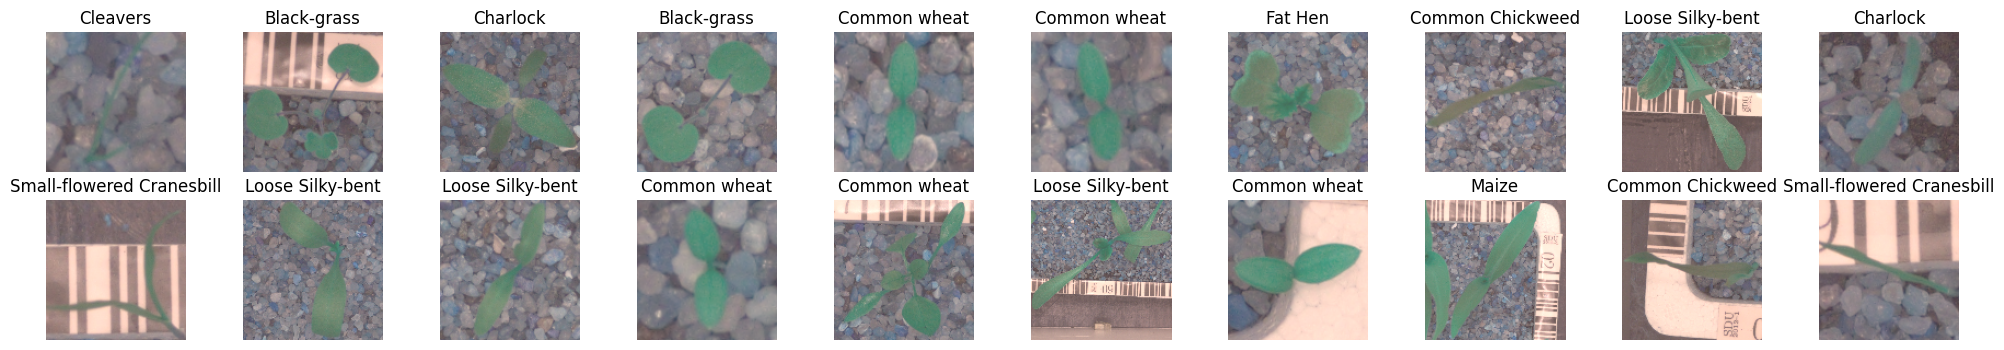

In [14]:
from torchvision import datasets
import torchvision.transforms as transforms
import torch
from torch.utils.data import DataLoader, TensorDataset
import multiprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision.datasets import ImageFolder
from PIL import Image

n_workers = multiprocessing.cpu_count()
print(n_workers)

mean = [0.2068, 0.2889, 0.3283]
std = [0.4548, 0.5375, 0.5730]

train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Create instance of the custom dataset
train_data = CustomImageDataset(images=X_train, labels=y_train, transform=train_transforms)

# Create DataLoader
train_loader = DataLoader(train_data, batch_size=20, num_workers=n_workers, shuffle=True)

# Obtain next batch
images, labels = next(iter(train_loader))
image = images[0]
label = labels[0]
print(image.shape)
print(label.shape)

# Function to display image
def imshow(img, sub):
  img = img / 2 + 0.5
  img = img.numpy()
  img = img.transpose((1, 2, 0))
  sub.imshow(img)
  sub.axis('off')

# Plot images
fig, subs = plt.subplots(2, 10, figsize=(25, 4))
for i, sub in enumerate(subs.flatten()):
  imshow(images[i], sub)
  # Get the index of the maximum value instead of the column name
  category_index = labels[i].argmax()
  sub.set_title(categories[category_index])

print(images.shape)
print(image.shape)

Create function for transforms with augmentations and create custom dataset and dataloaders.

In [15]:
from torchvision import datasets
import torchvision.transforms as transforms
import torch
from torch.utils.data import DataLoader, TensorDataset
import multiprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision.datasets import ImageFolder
from PIL import Image
import numpy as np

n_workers = multiprocessing.cpu_count()
print(n_workers)

# Create function for transformations for each dataset
# Function will allow for optimization of parameters
def get_transforms():
  mean = [0.2068, 0.2889, 0.3283]
  std = [0.4548, 0.5375, 0.5730]

  return{
    "train": transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(45),
        transforms.RandomAutocontrast(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'validate': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
  }

# Define a custom dataset class to apply transforms to individual images
class CustomImageDataset(torch.utils.data.Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels.iloc[idx].values  # Assuming labels is a pandas DataFrame

        # Convert the NumPy array to a PIL Image for augmentation
        image = Image.fromarray(image)

        if self.transform:
            image = self.transform(image)

        return image, label

#Create function for data loaders
def get_data_loaders(transforms, num_workers, random_seed=12):
  # Reseed random number generators for comparing experiments
  torch.manual_seed(random_seed)
  torch.cuda.manual_seed(random_seed)
  np.random.seed(random_seed)

  transforms = get_transforms()
  # Create each instance of the custom dataset
  train_data = CustomImageDataset(images=X_train, labels=y_train, transform=transforms['train'])
  val_data = CustomImageDataset(images=X_val, labels=y_val, transform=transforms['validate'])
  test_data = CustomImageDataset(images=X_test, labels=y_test, transform=transforms['test'])

  # Create data loaders
  train_loader = DataLoader(train_data, batch_size=100, num_workers=n_workers, shuffle=True)
  val_loader = DataLoader(val_data, batch_size=25, num_workers=n_workers, shuffle=True)
  test_loader = DataLoader(test_data, batch_size=25, num_workers=n_workers, shuffle=True)

  return {'train': train_loader, 'validate': val_loader, 'test': test_loader}

2


Define model structure:

In [16]:
import torch.nn as nn
from torchsummary import summary

# define CNN model
class Net(nn.Module):
    def __init__(self, num_classes=12):
        super(Net, self).__init__()

        self.model = nn.Sequential(
          # convolutional layer 1 (tensor 3x128x128 -> 16x64x64)
          nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
          nn.BatchNorm2d(16),
          nn.ELU(),
          nn.MaxPool2d(kernel_size=2, stride=2),
          # convolutional layer 2 - takes output of previous layer (16x64x64 -> 32x32x32)
          nn.Conv2d(16, 32, 3, padding=1),
          nn.BatchNorm2d(32),
          nn.ELU(),
          nn.MaxPool2d(2, 2),
          # convolutional layer 3 (32x32x32 -> 164x6x16)
          nn.Conv2d(32, 64, 3, padding=1),
          nn.BatchNorm2d(64),
          nn.ELU(),
          nn.MaxPool2d(2, 2),
          # linear layer (64x16x16 -> 500)
          nn.Flatten(),
          nn.Linear(64 * 16 * 16, 500),
          nn.Dropout(0.5),
          nn.BatchNorm1d(500),
          nn.ELU(),
          # linear layer (500 -> 12)
          nn.Linear(500, num_classes)
        )

    def forward(self, x):
      return self.model(x)

# create complete CNN
model = Net()
print(model)
summary(model, input_size=(3, 128, 128))

Net(
  (model): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ELU(alpha=1.0)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ELU(alpha=1.0)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=16384, out_features=500, bias=True)
    (14): Dropout(p=0.5, inplace=False)
    (15

Create functions for training loop and validation/test loop:

In [17]:
!pip install livelossplot

In [37]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [57]:
import torch.optim as optim
import livelossplot
from livelossplot import PlotLosses
from torchmetrics import Precision, Recall

# train on cuda if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Define the loss function
criterion = nn.CrossEntropyLoss()

def train_one_epoch(data_loaders, model, optimizer, criterion):
  liveloss = PlotLosses()
  for epoch in range(1):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    logs = {}
    # Iterate over training batches
    for images, labels in data_loaders:
        optimizer.zero_grad()
        outputs = model(images)
        labels = torch.argmax(labels, dim=1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(data_loaders)
    logs['train log loss'] = train_loss
    print(f"Training loss: {train_loss:.3f}")
    return train_loss
  liveloss.update(logs)
  liveloss.send()

def val_one_epoch(data_loaders, model, criterion):
  liveloss = PlotLosses()
  with torch.no_grad():
    for epoch in range(1):
      model.eval()
      running_loss = 0.0
      running_corrects = 0
      logs = {}
      # Initialize lists for storing predictions and labels
      preds = []
      actuals = []
      # Iterate over training batches
      for images, labels in data_loaders:
        outputs = model(images)
        labels = torch.argmax(labels, dim=1)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        running_corrects += torch.sum(predicted == labels.data)

      val_loss = running_loss / len(data_loaders)
      val_accuracy = float(running_corrects) / len(data_loaders.dataset)
      logs['val log loss'] = val_loss
      logs['val accuracy'] = val_accuracy
      print(f"Validation loss - validate: {val_loss:.3f}")
      print(f"Validation Accuracy: {val_accuracy:.3f}")
      return val_loss, val_accuracy
    liveloss.update(logs)
    liveloss.send()

def test_one_epoch(data_loaders, model, criterion):
  with torch.no_grad():
    for epoch in range(1):
      # Define metrics
      metric_precision = Precision(task = 'multiclass', num_classes = 12, average = None)
      metric_recall = Recall(task = 'multiclass', num_classes = 12, average = None)
      model.eval()
      running_loss = 0
      running_corrects = 0
      # Initialize lists for storing predictions and labels
      preds = []
      actuals = []
      # Iterate over training batches
      for images, labels in data_loaders:
        outputs = model(images)
        labels = torch.argmax(labels, dim=1)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        # Get and save predicted labels
        _, predicted = torch.max(outputs, 1)
        running_corrects += torch.sum(predicted == labels.data)
        preds.extend(outputs.cpu().numpy())
        actuals.extend(labels.cpu().numpy())

      # Convert predictions and actuals to numpy array
      preds = torch.tensor(np.array(preds))
      actuals = torch.tensor(np.array(actuals))

      # Calculate metrics
      metric_precision(preds, actuals)
      metric_recall(preds, actuals)


    val_loss = running_loss / len(data_loaders.dataset)
    accuracy = float(running_corrects) / len(data_loaders.dataset)
    print(f"Validation loss - test: {val_loss:.3f}")
    print(f"Test Accuracy: {accuracy:.3f}")
    precision = metric_precision.compute()
    recall = metric_recall.compute()
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    return val_loss, preds, actuals

Create early stopping class:

In [51]:
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_val_loss = float('inf')

    def early_stop(self, val_loss):
        if val_loss < self.min_val_loss:
            self.min_val_loss = val_loss
            self.counter = 0
        elif val_loss > (self.min_val_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

Define train one model:

In [20]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.7/648.7 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.6 MB/s eta 0:00:00


In [56]:
import mlflow
from torch.optim.lr_scheduler import ExponentialLR
import datetime # Used for experiment name
import os

# train on cuda if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
n_workers = multiprocessing.cpu_count()
save_path = "/content/drive/MyDrive/Colab Notebooks/Advanced Analytics"

def train_one_model(learning_rate, gamma, n_epochs):
  liveloss = PlotLosses()
  transforms = get_transforms()
  data_loaders = get_data_loaders(transforms, num_workers=n_workers)
  model = Net()
  val_loss_min = None

  if train_on_gpu:
    model.cuda()

  optimizer = optim.Adam(model.parameters(), lr = learning_rate)
  scheduler = ExponentialLR(optimizer, gamma=gamma)
  criterion = nn.CrossEntropyLoss()

  with mlflow.start_run():
    for epoch in range(n_epochs):
      logs= {}
      print("Epoch: ", epoch)
      train_loss = train_one_epoch(data_loaders['train'], model, optimizer, criterion)

      val_loss, val_accuracy = val_one_epoch(data_loaders['validate'], model, criterion)

      # Include early stop if necessary
      early_stopper = EarlyStopper(patience=3)
      if early_stopper.early_stop(val_loss):
        print("We are at epoch:", epoch)
        break

      # Save model if validation loss decreases by more than 1%
      if val_loss_min is None or(
          (val_loss_min - val_loss) / val_loss_min > 0.01
          ):

        # Save weights
        filename = os.path.join(save_path, 'best_val_loss.pt')
        torch.save(model.state_dict(), filename)

        val_loss_min = val_loss

      logs['validation loss'] = val_loss
      logs['training loss'] = train_loss
      logs["validation accuracy"] = val_accuracy
      liveloss.update(logs)
      liveloss.send()

      # Update learning rate
      scheduler.step(val_loss)

      # Test model on validation set (no optimization)
      val_loss, preds, actuals = test_one_epoch(data_loaders['validate'], model, criterion)

      # Restore best validation loss parameter
      model.load_state_dict(torch.load(filename))

      # Log hyperparameters
      mlflow.log_metric("val_loss", val_loss)
      mlflow.log_param("learning_rate", learning_rate)
      mlflow.log_param("n_epochs", n_epochs)
      mlflow.log_param("gamma", gamma)

      # Log metrics
      mlflow.log_metric("train_loss", train_loss)
      mlflow.log_metric("val_loss", val_loss)
      val_accuracy = (np.argmax(preds, axis=1) == np.array(actuals)).sum() / len(actuals)
      mlflow.log_metric("val_accuracy", val_accuracy)
      mlflow.log_artifact(filename)
    return model
  mlflow.end_run()


Use random search to explore hyperparameters:

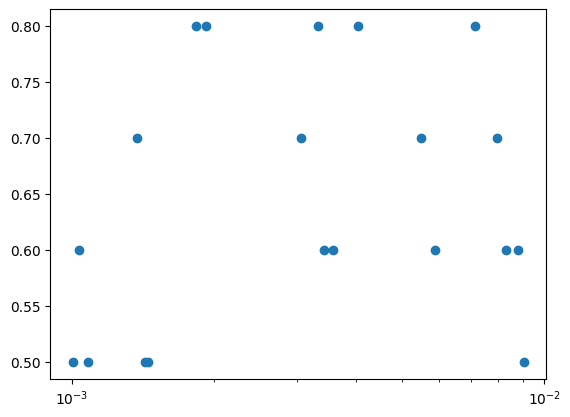

In [26]:
# Create random grid of learning rate and gamma
min_lr = 0.001
max_lr = 0.01
n_grid = 20

# Sample learning rate log samples
lrs = 10**(np.random.uniform(np.log10(min_lr), np.log10(max_lr), n_grid))
# Uniformly sample gamma rate
gamma = np.random.randint(5, 9, n_grid) / 10

# Plot grid
_ = plt.scatter(lrs, gamma)
_ = plt.xscale("log")

Run experiment to determine best learning-rate and gamma values:

In [28]:
for lr, g in zip(lrs, gamma):
  train_one_model(lr, g, n_epochs=5)

Epoch:  0
Training loss: 1.779
Validation loss - validate: 1.661
Validation Accuracy: 0.453
Validation loss - test: 0.066
Test Accuracy: 0.453
Epoch:  1


<ipython-input-25-4c4b3fabe1a4>:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(filename))


Training loss: 1.284
Validation loss - validate: 1.212
Validation Accuracy: 0.615
Validation loss - test: 0.048
Test Accuracy: 0.615
Epoch:  2
Training loss: 1.082
Validation loss - validate: 1.042
Validation Accuracy: 0.642
Validation loss - test: 0.042
Test Accuracy: 0.642
Epoch:  3
Training loss: 0.998
Validation loss - validate: 1.001
Validation Accuracy: 0.651
Validation loss - test: 0.040
Test Accuracy: 0.651
Epoch:  4
Training loss: 0.917
Validation loss - validate: 0.947
Validation Accuracy: 0.655
Validation loss - test: 0.038
Test Accuracy: 0.655
Epoch:  0
Training loss: 1.749
Validation loss - validate: 1.534
Validation Accuracy: 0.495
Validation loss - test: 0.061
Test Accuracy: 0.495
Epoch:  1
Training loss: 1.241
Validation loss - validate: 1.093
Validation Accuracy: 0.625
Validation loss - test: 0.044
Test Accuracy: 0.625
Epoch:  2
Training loss: 1.043
Validation loss - validate: 1.128
Validation Accuracy: 0.640
Validation loss - test: 0.045
Test Accuracy: 0.640
Epoch:  3

Retrieve mlflow data on experiment:

In [29]:
import mlflow

runs = mlflow.search_runs()
sorted_runs = runs[
    ["run_id",
     "params.learning_rate",
     "params.n_epochs",
     "params.gamma",
     "metrics.train_loss",
     "metrics.val_loss",
     "metrics.val_accuracy"
    ]
].sort_values(by="metrics.val_loss", ascending=True)
sorted_runs

,run_id,params.learning_rate,params.n_epochs,params.gamma,metrics.train_loss,metrics.val_loss,metrics.val_accuracy
14,a99b773d328a47d892da69bdea79e363,0.008293674908605475,5,0.6,0.929735,0.032949,0.738947
1,066614e2ad7b4c12be4fbead33459323,0.005863192512339714,5,0.6,0.884745,0.033293,0.715789
2,a86aeb3916f845e8bdcb24ab3d28ab75,0.003057577076255498,5,0.7,0.898287,0.033676,0.709474
7,c21ee1cd95924147accc3b554725c532,0.008794783157695697,5,0.6,0.912329,0.033954,0.722105
6,943325aba9fe4d498495ccecd8ab436e,0.007124190781828619,5,0.8,0.893025,0.034535,0.728421
16,59ad864641d64db9a0256d2ff0f9a13e,0.0034177429283790495,5,0.6,0.892751,0.035029,0.705263
18,b895821e6f4a438389374b937c4f2020,0.005496037616682325,5,0.7,0.950851,0.035216,0.703158
4,28c21eab661c4d7ca66cedb8dad2cb7d,0.0033206723595393755,5,0.8,0.895180,0.035251,0.692632
17,e2569cf3b43a4428b0b420a613251613,0.0018336439724345017,5,0.8,0.908110,0.035508,0.677895
8,e24e6c2bb94d4faba08583b9cc674a43,0.004037227142333932,5,0.8,0.884938,0.036171,0.715789


Save model with best parameters in case I need it later:

In [30]:
from mlflow.tracking import MlflowClient

lowest_loss_id = sorted_runs.iloc[0]['run_id']

# Fetch model for that run
client = MlflowClient()
local_path = client.download_artifacts(lowest_loss_id, "best_val_loss.pt", '.')

Train model with selected parameters to determine optimal number of epochs to use:

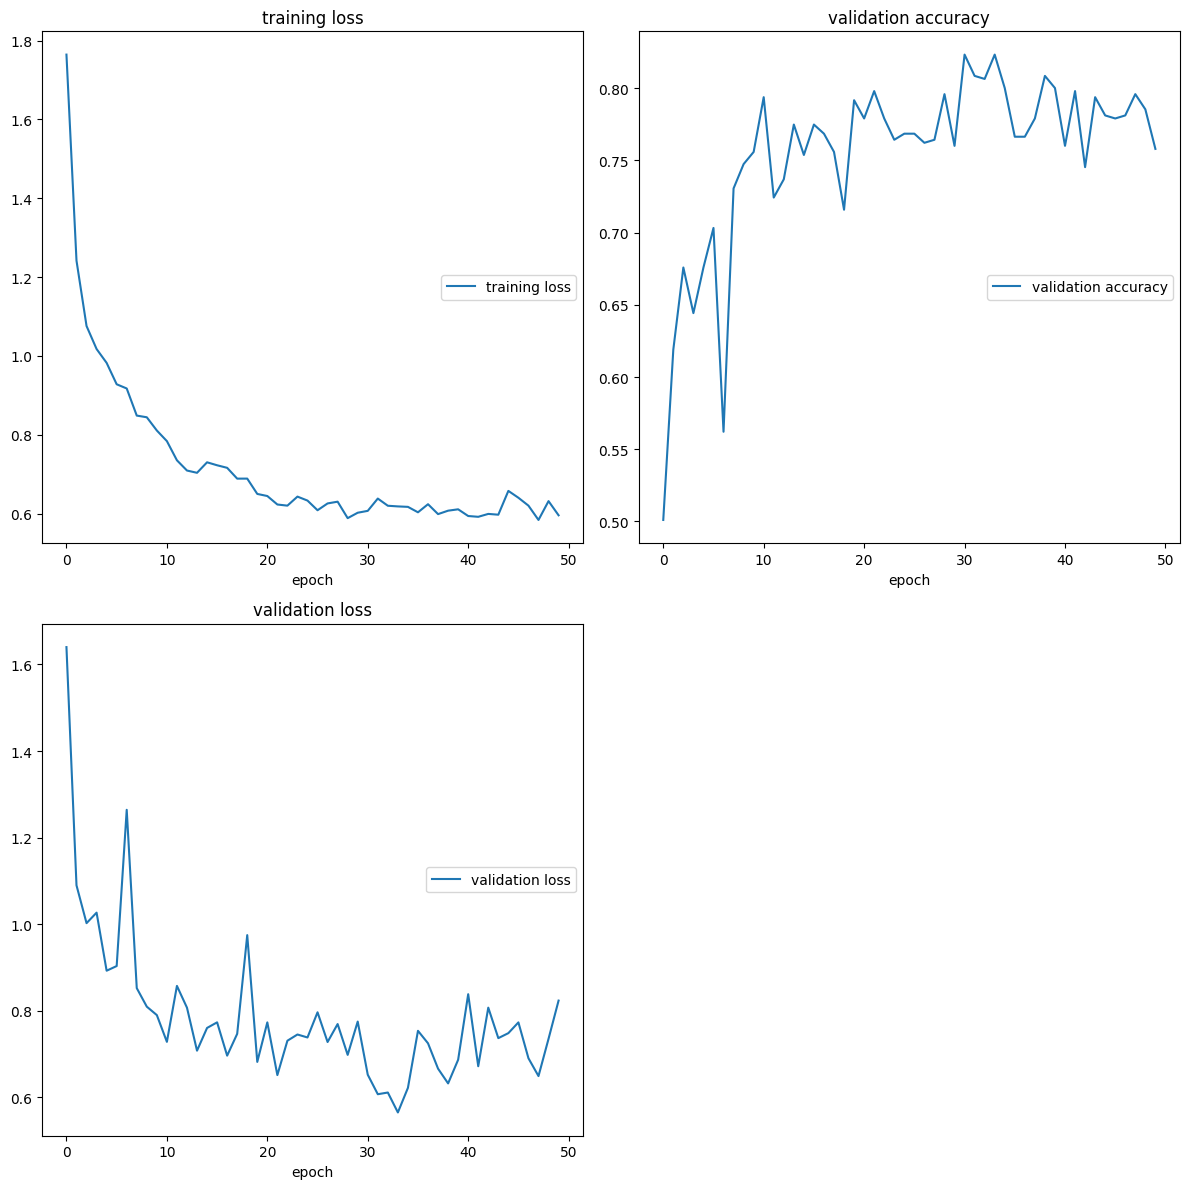

training loss
	training loss    	 (min:    0.584, max:    1.764, cur:    0.596)
validation accuracy
	validation accuracy 	 (min:    0.501, max:    0.823, cur:    0.758)
validation loss
	validation loss  	 (min:    0.565, max:    1.640, cur:    0.823)
Validation loss - test: 0.033
Test Accuracy: 0.758


In [34]:
model_train = train_one_model(learning_rate=0.008, gamma=0.6, n_epochs=50)

Based on this experiment, using 34 epochs will be an ideal number. I will train a final model using these parameters.

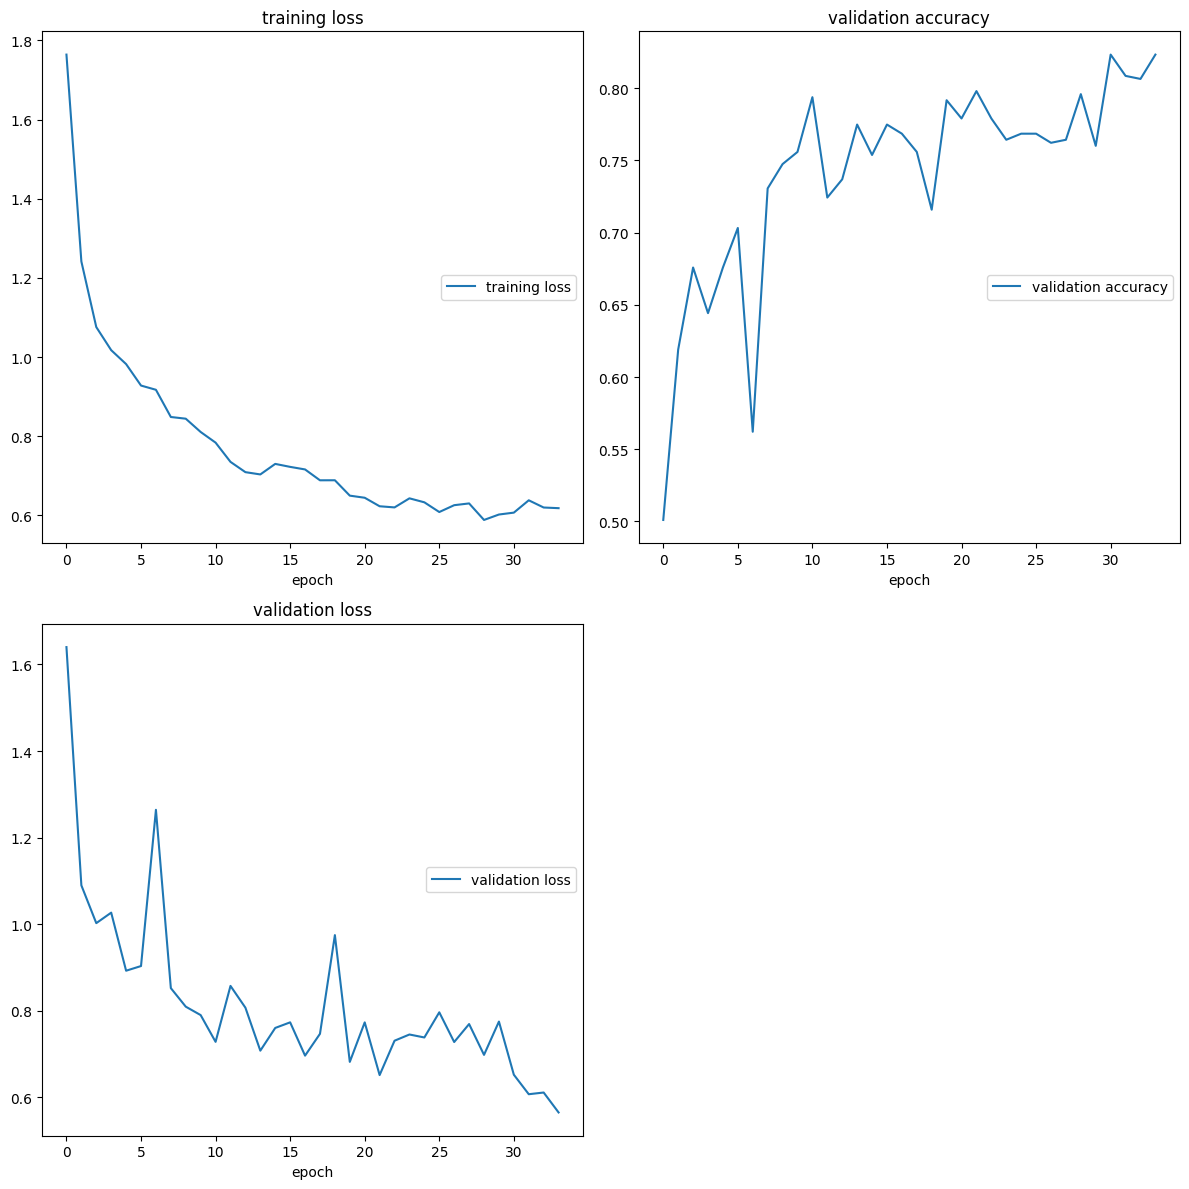

training loss
	training loss    	 (min:    0.589, max:    1.764, cur:    0.618)
validation accuracy
	validation accuracy 	 (min:    0.501, max:    0.823, cur:    0.823)
validation loss
	validation loss  	 (min:    0.565, max:    1.640, cur:    0.565)
Validation loss - test: 0.023
Test Accuracy: 0.823
Precision: tensor([0.4643, 0.8750, 0.9545, 0.9091, 0.7692, 0.8235, 0.7719, 0.9444, 0.7288,
        0.7083, 0.9574, 0.9189])
Recall: tensor([0.5000, 0.8974, 0.7241, 0.9836, 0.9091, 0.8750, 0.6769, 0.7727, 0.8431,
        0.7391, 0.9000, 0.8718])


In [58]:
final_model = train_one_model(learning_rate=0.008, gamma=0.6, n_epochs=34)

Save final model:

In [59]:
model_scripted = torch.jit.script(final_model) # Export to TorchScript
model_scripted.save('model_scripted.pt') # Save

Now that the model has been trained and saved, it will need to be loaded and tested. Load model"

In [60]:
fmodel = torch.jit.load('model_scripted.pt')
fmodel.eval() # Model must be put into eval mode for correct testing

RecursiveScriptModule(
  original_name=Net
  (model): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Conv2d)
    (1): RecursiveScriptModule(original_name=BatchNorm2d)
    (2): RecursiveScriptModule(original_name=ELU)
    (3): RecursiveScriptModule(original_name=MaxPool2d)
    (4): RecursiveScriptModule(original_name=Conv2d)
    (5): RecursiveScriptModule(original_name=BatchNorm2d)
    (6): RecursiveScriptModule(original_name=ELU)
    (7): RecursiveScriptModule(original_name=MaxPool2d)
    (8): RecursiveScriptModule(original_name=Conv2d)
    (9): RecursiveScriptModule(original_name=BatchNorm2d)
    (10): RecursiveScriptModule(original_name=ELU)
    (11): RecursiveScriptModule(original_name=MaxPool2d)
    (12): RecursiveScriptModule(original_name=Flatten)
    (13): RecursiveScriptModule(original_name=Linear)
    (14): RecursiveScriptModule(original_name=Dropout)
    (15): RecursiveScriptModule(original_name=BatchNorm1d)
    (16): Recursiv

Use test data to determine model accuracy:

In [72]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

n_workers = multiprocessing.cpu_count()

criterion = nn.CrossEntropyLoss()
test_transforms = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
test_data = CustomImageDataset(images=X_test, labels=y_test,
                                 transform=test_transforms)

test_loader = DataLoader(test_data, batch_size=25, num_workers=n_workers,
                         shuffle=True)

val_loss, preds, actuals = test_one_epoch(test_loader, fmodel, criterion)

Validation loss - test: 0.025
Test Accuracy: 0.811
Precision: tensor([0.6400, 0.7949, 0.8696, 0.8824, 0.7917, 0.7818, 0.8226, 0.7308, 0.8077,
        0.8182, 0.8864, 0.7714])
Recall: tensor([0.5926, 0.7949, 0.6897, 0.9836, 0.8636, 0.9149, 0.7727, 0.8636, 0.8077,
        0.7826, 0.7959, 0.7105])


Create confusion matrix:

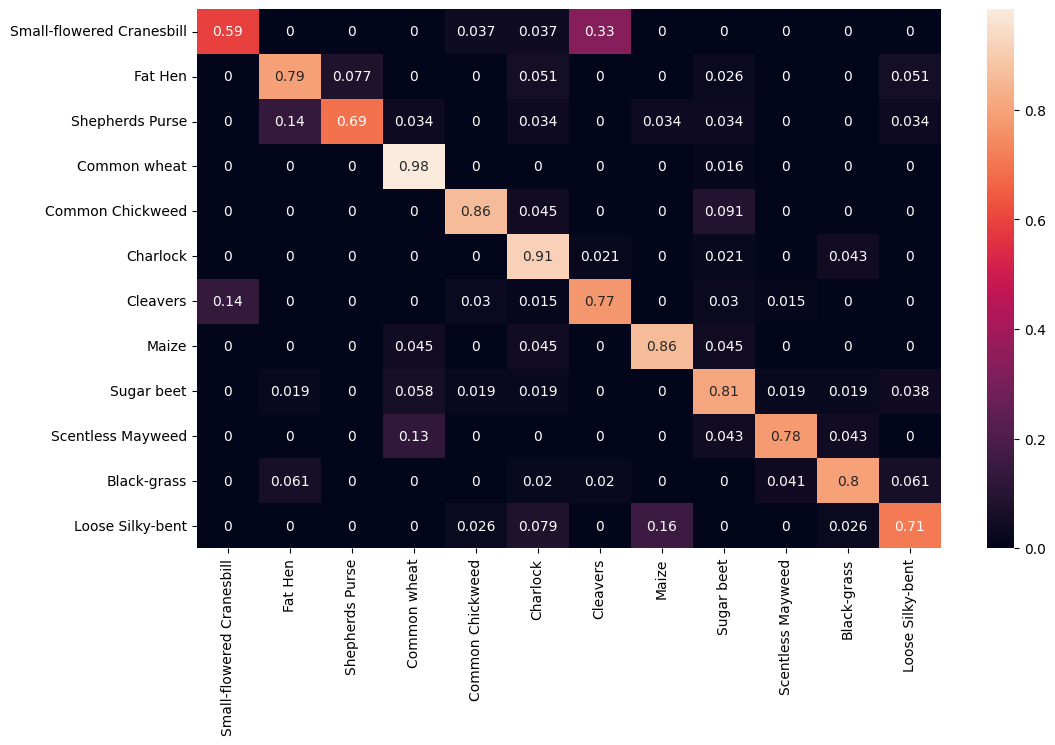

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

# Build confusion matrix
predicted_labels = np.argmax(preds, axis=1)
cf_matrix = confusion_matrix(actuals, predicted_labels)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None],
                     index = [i for i in categories],
                     columns = [i for i in categories])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('cf_matrix.png')